## Estructura del Proyecto: Desarrollo Integral de un Sistema de Domótica-IoT con IA de Gemini
Este proyecto interactúa con la API de Google Gemini para dos propósitos principales:

1. **Generación de texto:** Permite obtener respuestas textuales detalladas a partir de prompts específicos, cuya finalidad es el diseño de un sistema de domótica (tanto hardware como firmware).
2. **Generación de imágenes:** Permite crear imágenes a partir de descripciones textuales, como el diseño de un logo.
El código está estructurado para facilitar la comprensión y la reutilización de las funciones.
---
## 1. Instalación de Librerías y Configuraciones Iniciales
En esta sección, instalamos las librerías necesarias y configuramos el cliente de la API de Google Gemini.

In [1]:
# Instala las librerías necesarias si aún no las tienes
#!pip install -U -q google-genai
#!pip install Pillow
#!pip install python-dotenv
#!pip install matplotlib
#!pip install numpy pandas 

from google import genai
from google.genai import types
from PIL import Image
from io import BytesIO
import base64
import os # Importamos 'os' para manejar variables de entorno
from dotenv import load_dotenv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick # Para formatear los ticks del eje Y como porcentajes
import re # Para expresiones regulares, útil para extraer información de texto

load_dotenv()  # Carga las variables del archivo .env. Colocar API Key dentro de GOOGLE_API_KEY=
api_key = os.getenv("GOOGLE_API_KEY")

client = genai.Client(api_key=api_key)


## 2. Función para Generar Prompts Estructurados
Esta función ```(generate_prompt)``` crea un prompt detallado para el modelo Gemini, permitiéndote definir el rol del modelo, la tarea, y añadir restricciones y ejemplos para guiar la respuesta.

In [2]:
def generate_prompt(role, task, constraints=None, examples=None):
    """
    Genera un prompt estructurado para el modelo Gemini.

    Argumentos:
        role (str): El rol que el modelo debe asumir (ej. "Experto en electrónica").
        task (str): La tarea específica que el modelo debe realizar.
        constraints (list, opcional): Una lista de restricciones o requisitos.
        examples (list, opcional): Una lista de ejemplos de la salida deseada.

    Retorna:
        str: El prompt completo.
    """
    prompt = f"Eres un {role}. Tu tarea es {task}. "

    if constraints:
        prompt += "\nConsidera las siguientes restricciones:\n"
        for constraint in constraints:
            prompt += f"- {constraint}\n"

    if examples:
        prompt += "\nAquí hay un ejemplo del formato de salida deseado:\n"
        for example in examples:
            prompt += f"- {example}\n"
    
    prompt += "\nPor favor, proporciona una respuesta clara y concisa."
    return prompt

## 3. Funciones para Interactuar con la API de Gemini
Aquí definimos dos funciones clave: una para generar imágenes a partir de texto y otra para generar texto a partir de texto.

**3.1. ```text_to_img``` (Generación de Imágenes)**
Esta función utiliza el modelo ```gemini-2.0-flash-preview-image-generation``` para crear una imagen basada en el prompt proporcionado. La imagen generada se guarda, en este caso, como ```iot-logo.png```.

In [3]:
def text_to_img(image_text):

    """
    Función para generar imagen a partir de texto

    Argumento:
        image_text: Prompt para generar la imagen.
    """
    
    response = client.models.generate_content(
        model="gemini-2.0-flash-preview-image-generation",
        contents=image_text,
        config=types.GenerateContentConfig(
          response_modalities=['TEXT', 'IMAGE']
        )
    )
    
    for part in response.candidates[0].content.parts:
      if part.text is not None:
        print(part.text)
      elif part.inline_data is not None:
        image = Image.open(BytesIO((part.inline_data.data)))
        image.save('iot-logo.png')
    return

**3.2. ```text_to_text``` (Generación de Texto)**
Esta función utiliza el modelo ```gemini-2.0-flash``` para generar respuestas textuales a partir de un prompt de texto.

In [4]:
def text_to_text(text_content):
    
    """
    Función para generar respuestas a partir de texto usando la IA

    Argumento:
        text_content: Prompt para generar la respuesta de texto.
    """

    response = client.models.generate_content(
    model="gemini-2.0-flash",
    contents=text_content
    )
    print(response.text)
    return 

**3.3. ```get_text_response_for_parsing``` (Generación de Texto para gráficos)**
Esta función utiliza el modelo ```gemini-2.0-flash``` para generar respuestas textuales a partir de un prompt de texto, pero esta vez retornando response.text para parsear esta respuesta y generar el gráfico de barras más abajo.

In [5]:
def get_text_response_for_parsing(text_content):
    """
    Función auxiliar para generar respuestas de texto de la IA y retornarlas directamente,
    sin imprimirlas. Útil para cuando la respuesta será procesada posteriormente.
    Argumento:
        text_content: Prompt para generar la respuesta de texto.
    Retorna:
        str: La respuesta de texto generada por Gemini.
    """
    response = client.models.generate_content(
        model="gemini-2.0-flash",
        contents=text_content
    )
    return response.text

## 4. Ejemplos de Uso de las Funciones
En esta sección, demostramos cómo utilizar las funciones generate_prompt, text_to_text, get_text_response_for_parsing y text_to_img para casos de uso específicos.

### 4.1. Diseño de un Sistema de Domótica Integral (Generación de Texto)
Aquí generamos un prompt (zero-shot prompting) para que el modelo actúe como un "ingeniero de sistemas de domótica" y diseñe un sistema integral. La respuesta se imprimirá en la consola.

In [6]:
prompt_sistema_integral = generate_prompt(
    role="ingeniero de sistemas de domótica",
    task="diseñar un sistema de domótica integral con un ESP32 como microcontrolador principal, capaz de controlar luces, electrodomésticos y sensores del hogar. Sugiere todos los componentes electrónicos necesarios (relevadores, sensores, fuentes, protecciones), y propón una arquitectura robusta de hardware y software. Incluye opciones para la conexión a plataformas IoT compatibles con celular (como Home Assistant, Blynk, etc.). El sistema debe ser escalable y seguro.",
    constraints=[
        "El microcontrolador principal debe ser un ESP32.",
        "Debe controlar luces, electrodomésticos y sensores.",
        "Listar componentes electrónicos con su función.",
        "Describir la arquitectura de hardware (diagrama conceptual si es posible con texto).",
        "Describir la arquitectura de software (componentes clave y flujo).",
        "Mencionar al menos dos plataformas IoT compatibles con celular.",
        "El diseño debe enfatizar la escalabilidad y seguridad."
    ]
)
print("--- PROMPT: Diseño de Sistema Integral ---")
print(prompt_sistema_integral)
print("\n--- RESPUESTA: Diseño de Sistema Integral ---")
text_to_text(prompt_sistema_integral) 

--- PROMPT: Diseño de Sistema Integral ---
Eres un ingeniero de sistemas de domótica. Tu tarea es diseñar un sistema de domótica integral con un ESP32 como microcontrolador principal, capaz de controlar luces, electrodomésticos y sensores del hogar. Sugiere todos los componentes electrónicos necesarios (relevadores, sensores, fuentes, protecciones), y propón una arquitectura robusta de hardware y software. Incluye opciones para la conexión a plataformas IoT compatibles con celular (como Home Assistant, Blynk, etc.). El sistema debe ser escalable y seguro.. 
Considera las siguientes restricciones:
- El microcontrolador principal debe ser un ESP32.
- Debe controlar luces, electrodomésticos y sensores.
- Listar componentes electrónicos con su función.
- Describir la arquitectura de hardware (diagrama conceptual si es posible con texto).
- Describir la arquitectura de software (componentes clave y flujo).
- Mencionar al menos dos plataformas IoT compatibles con celular.
- El diseño debe en

### 4.2. Selección de plataformas IoT

A continuación creamos un prompt para que el modelo nos recomiende plataformas de control para el sistema IoT y nos oriente en la configuración de las mismas. En el prompt se brindan algunos ejemplos (few-shot).

In [7]:
prompt_plataforma_iot = generate_prompt(
    role="experto en plataformas IoT para ESP32",
    task="recomendar una plataforma IoT gratuita o de bajo costo compatible con ESP32 que me permita controlar luces y dispositivos desde el celular. Incluye una guía de integración paso a paso con ESP-IDF, incluyendo librerías necesarias, autenticación segura y cómo enviar y recibir comandos desde la nube.",
    constraints=[
        "La plataforma debe ser gratuita o de bajo costo.",
        "Debe ser compatible con ESP32.",
        "Debe permitir el control desde el celular.",
        "Proporcionar una guía de integración paso a paso con ESP-IDF.",
        "Listar librerías necesarias (o componentes de ESP-IDF).",
        "Explicar la autenticación segura.",
        "Detallar cómo enviar y recibir comandos desde la nube."
    ],
    examples=[
        "Blynk",
        "Home Assistant",
        "MQTT con Node-RED"
    ]
)
print("\n--- PROMPT: Plataforma IoT y Guía ---")
print(prompt_plataforma_iot)
print("\n--- RESPUESTA: Plataforma IoT y Guía ---")
text_to_text(prompt_plataforma_iot) 


--- PROMPT: Plataforma IoT y Guía ---
Eres un experto en plataformas IoT para ESP32. Tu tarea es recomendar una plataforma IoT gratuita o de bajo costo compatible con ESP32 que me permita controlar luces y dispositivos desde el celular. Incluye una guía de integración paso a paso con ESP-IDF, incluyendo librerías necesarias, autenticación segura y cómo enviar y recibir comandos desde la nube.. 
Considera las siguientes restricciones:
- La plataforma debe ser gratuita o de bajo costo.
- Debe ser compatible con ESP32.
- Debe permitir el control desde el celular.
- Proporcionar una guía de integración paso a paso con ESP-IDF.
- Listar librerías necesarias (o componentes de ESP-IDF).
- Explicar la autenticación segura.
- Detallar cómo enviar y recibir comandos desde la nube.

Aquí hay un ejemplo del formato de salida deseado:
- Blynk
- Home Assistant
- MQTT con Node-RED

Por favor, proporciona una respuesta clara y concisa.

--- RESPUESTA: Plataforma IoT y Guía ---
¡Claro!  Aquí te presen

### 4.3. Análisis y Visualización del Porcentaje de Uso de Plataformas IoT
Para complementar la recomendación de plataformas IoT, se ha añadido una funcionalidad para estimar y visualizar la popularidad o el porcentaje de uso de las mismas en proyectos de domótica con ESP32. Dado que el modelo Gemini no tiene acceso a datos de mercado en tiempo real, se le solicita que genere una estimación basada en su conocimiento adquirido durante el entrenamiento.                                                                    Los gráficos se generan usando pandas, numpy y matplotlib.         


--- PROMPT: Preguntar a Gemini por porcentajes de uso de plataformas IoT ---
Eres un analista de mercado de IoT. Tu tarea es proporcionar una estimación del porcentaje de uso o popularidad de las siguientes plataformas IoT en proyectos de domótica con ESP32. Por favor, presenta la información como una lista numerada, donde cada elemento incluya el nombre de la plataforma y un porcentaje estimado entre paréntesis, asegurándote de que los porcentajes sumen aproximadamente 100% si es posible. Las plataformas son: Blynk, Home Assistant, ESP-Rainmaker, MQTT, Tuya IoT, OpenHAB. 
Considera las siguientes restricciones:
- Estimar el porcentaje de uso o popularidad en proyectos con ESP32.
- Formato: '1. [Nombre de Plataforma] ([Porcentaje]%)'
- Los porcentajes deben sumar aproximadamente 100%.
- Si una plataforma no es relevante, puedes asignar 0% o un valor bajo.

Por favor, proporciona una respuesta clara y concisa.

--- RESPUESTA de Gemini sobre Porcentajes de Uso ---
Aquí está la estimació

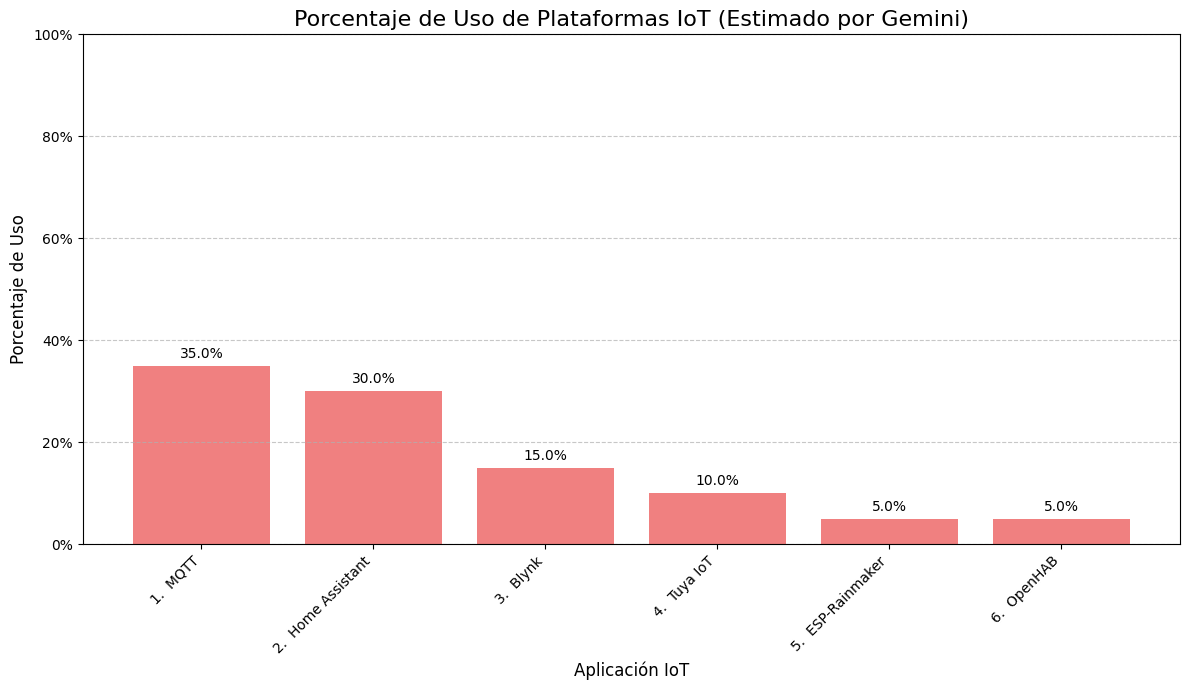

Gráfico de barras generado exitosamente con datos (posiblemente estimados) de Gemini.


In [8]:
print("\n--- PROMPT: Preguntar a Gemini por porcentajes de uso de plataformas IoT ---")

# Lista de plataformas que queremos consultar (puedes ajustar esta lista)
# Usamos las que ya mencionaste o las que el prompt original podría generar.
plataformas_iot_interes = ["Blynk", "Home Assistant", "ESP-Rainmaker", "MQTT", "Tuya IoT", "OpenHAB"]

# Generar un prompt para que Gemini nos dé porcentajes.
# Le pedimos un formato específico para intentar facilitar el parseo.
prompt_porcentajes_iot = generate_prompt(
    role="analista de mercado de IoT",
    task=f"proporcionar una estimación del porcentaje de uso o popularidad de las siguientes plataformas IoT en proyectos de domótica con ESP32. Por favor, presenta la información como una lista numerada, donde cada elemento incluya el nombre de la plataforma y un porcentaje estimado entre paréntesis, asegurándote de que los porcentajes sumen aproximadamente 100% si es posible. Las plataformas son: {', '.join(plataformas_iot_interes)}",
    constraints=[
        "Estimar el porcentaje de uso o popularidad en proyectos con ESP32.",
        "Formato: '1. [Nombre de Plataforma] ([Porcentaje]%)'",
        "Los porcentajes deben sumar aproximadamente 100%.",
        "Si una plataforma no es relevante, puedes asignar 0% o un valor bajo."
    ]
)

print(prompt_porcentajes_iot)

print("\n--- RESPUESTA de Gemini sobre Porcentajes de Uso ---")
respuesta_gemini_porcentajes = get_text_response_for_parsing(prompt_porcentajes_iot)
print(respuesta_gemini_porcentajes)

# Inicializar listas para almacenar nombres de apps y porcentajes
apps_extraidas = []
porcentajes_extraidos = []

# Expresión regular para encontrar el patrón "Nombre de Plataforma (Porcentaje%)"
# Captura el nombre de la plataforma y el número del porcentaje.
# Se busca un número (\\d+ o \\d*\\.?\\d+) seguido de un porcentaje, dentro de paréntesis.
# Mejoramos el regex para que sea más robusto a diferentes formatos de nombres.
patron = re.compile(r'([A-Za-z0-9\s\-\.]+) \((\d+\.?\d*)%\)') # Captura nombre y porcentaje

for linea in respuesta_gemini_porcentajes.split('\n'):
    match = patron.search(linea)
    if match:
        app_name = match.group(1).strip() # El nombre de la app está en el primer grupo
        try:
            percentage = float(match.group(2)) # El porcentaje está en el segundo grupo
            apps_extraidas.append(app_name)
            porcentajes_extraidos.append(percentage)
        except ValueError:
            print(f"Advertencia: No se pudo convertir '{match.group(2)}' a número. Saltando.")


# Asegurarse de que tenemos datos para graficar
if not apps_extraidas:
    print("No se pudieron extraer datos de plataformas IoT y porcentajes de la respuesta de Gemini.")
    print("Usando datos de ejemplo para el gráfico.")
    # Fallback a datos hipotéticos si la extracción falla
    apps_extraidas = ['Blynk', 'Home Assistant', 'ESP-Rainmaker', 'MQTT', 'Tuya IoT']
    porcentajes_extraidos = [30, 25, 30, 10, 5]

# Crear un DataFrame de Pandas con los datos extraídos
df_iot_apps = pd.DataFrame({
    'Aplicación IoT': apps_extraidas,
    'Porcentaje de Uso': porcentajes_extraidos
})

# Opcional: Normalizar los porcentajes si no suman 100% (Gemini podría no ser exacto)
total_porcentajes = df_iot_apps['Porcentaje de Uso'].sum()
if total_porcentajes > 0 and abs(total_porcentajes - 100) > 1: # Si no está muy cerca de 100
    print(f"Advertencia: Los porcentajes sumaron {total_porcentajes:.2f}%. Normalizando a 100%.")
    df_iot_apps['Porcentaje de Uso'] = (df_iot_apps['Porcentaje de Uso'] / total_porcentajes) * 100


print("\nDataFrame con datos de uso de Apps IoT (extraídos de Gemini o de ejemplo):")
print(df_iot_apps)

plt.figure(figsize=(12, 7)) # Define el tamaño del gráfico, un poco más grande

# Crear el gráfico de barras
bars = plt.bar(df_iot_apps['Aplicación IoT'], df_iot_apps['Porcentaje de Uso'], color='lightcoral')

# Añadir títulos y etiquetas
plt.title('Porcentaje de Uso de Plataformas IoT (Estimado por Gemini)', fontsize=16)
plt.xlabel('Aplicación IoT', fontsize=12)
plt.ylabel('Porcentaje de Uso', fontsize=12)

# Formatear el eje Y para mostrar porcentajes
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())

# Añadir el porcentaje sobre cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.1f}%', ha='center', va='bottom', fontsize=10) # Ajusta +1 para la posición del texto

plt.ylim(0, max(100, df_iot_apps['Porcentaje de Uso'].max() * 1.1)) # Establece el límite del eje Y
plt.grid(axis='y', linestyle='--', alpha=0.7) # Añadir una cuadrícula en el eje Y
plt.xticks(rotation=45, ha='right') # Rotar etiquetas del eje X si son largas
plt.tight_layout() # Ajusta el diseño para evitar superposiciones
plt.show() # Muestra el gráfico

print("Gráfico de barras generado exitosamente con datos (posiblemente estimados) de Gemini.")

### 4.4. Generación del Firmware (código en C para el microcontrolador)

Se genera el prompt, brindando un único ejemplo de código (one-shot prompting), para que el sistema nos proporcione el firmware base para nuestro sistema de control IoT. En constraints se le dan los lineamientos a seguir (como se realizó previamente en los anteriores prompts). 

In [9]:
prompt_codigo_c = generate_prompt(
    role="programador experto en ESP-IDF y FreeRTOS",
    task="proporcionar un ejemplo completo en C para ESP-IDF que controle luces y electrodomésticos mediante relés conectados al ESP32. El sistema debe incluir control manual (por botón físico) y remoto (por app IoT). Agrega lógica para el control seguro de relés (evitar rebotes, evitar encendido simultáneo no deseado). Incluye recomendaciones de pines GPIO y cómo alimentar y proteger los relés.",
    constraints=[
        "El código debe ser en C para ESP-IDF v5.1.2.",
        "Debe controlar relés (luces/electrodomésticos).",
        "Debe tener control manual (botón físico con debouncing).",
        "Debe tener control remoto (integración con una plataforma IoT, usando MQTT como protocolo).",
        "Incluir lógica para evitar rebotes (debouncing).",
        "Incluir lógica para evitar encendido simultáneo no deseado (si aplica a un escenario de dos relés en conflicto).",
        "Recomendar pines GPIO específicos para relés y botones.",
        "Explicar cómo alimentar y proteger los relés (diodos, fusibles, optoacopladores)."
    ],
    examples=[
        """
        ```c
        #include <stdio.h>
        #include "driver/gpio.h"
        #include "freertos/FreeRTOS.h"
        #include "freertos/task.h"

        #define RELAY_GPIO 2
        #define BUTTON_GPIO 0

        void app_main(void) {
            gpio_reset_pin(RELAY_GPIO);
            gpio_set_direction(RELAY_GPIO, GPIO_MODE_OUTPUT);
            gpio_set_level(RELAY_GPIO, 0); // Relay OFF initially

            gpio_reset_pin(BUTTON_GPIO);
            gpio_set_direction(BUTTON_GPIO, GPIO_MODE_INPUT);
            gpio_set_pull_mode(BUTTON_GPIO, GPIO_PULLUP_ENABLE);

            bool last_button_state = false;
            while(1) {
                bool current_button_state = gpio_get_level(BUTTON_GPIO);
                if (current_button_state != last_button_state) {
                    vTaskDelay(pdMS_TO_TICKS(50)); // Debounce
                    current_button_state = gpio_get_level(BUTTON_GPIO);
                    if (current_button_state == 0 && !last_button_state) { // Button pressed (falling edge)
                        gpio_set_level(RELAY_GPIO, !gpio_get_level(RELAY_GPIO)); // Toggle relay
                    }
                    last_button_state = current_button_state;
                }
                vTaskDelay(pdMS_TO_TICKS(10));
            }
        }
        ```
        """
    ]
)
print("\n--- PROMPT: Código C para ESP-IDF ---")
print(prompt_codigo_c)
print("\n--- RESPUESTA: Código C para ESP-IDF ---")
text_to_text(prompt_codigo_c) 


--- PROMPT: Código C para ESP-IDF ---
Eres un programador experto en ESP-IDF y FreeRTOS. Tu tarea es proporcionar un ejemplo completo en C para ESP-IDF que controle luces y electrodomésticos mediante relés conectados al ESP32. El sistema debe incluir control manual (por botón físico) y remoto (por app IoT). Agrega lógica para el control seguro de relés (evitar rebotes, evitar encendido simultáneo no deseado). Incluye recomendaciones de pines GPIO y cómo alimentar y proteger los relés.. 
Considera las siguientes restricciones:
- El código debe ser en C para ESP-IDF v5.1.2.
- Debe controlar relés (luces/electrodomésticos).
- Debe tener control manual (botón físico con debouncing).
- Debe tener control remoto (integración con una plataforma IoT, usando MQTT como protocolo).
- Incluir lógica para evitar rebotes (debouncing).
- Incluir lógica para evitar encendido simultáneo no deseado (si aplica a un escenario de dos relés en conflicto).
- Recomendar pines GPIO específicos para relés y bo

### 4.5. Diseño de un Logo de Tecnología IoT (Generación de Imagen)

En este ejemplo, creamos un prompt para que el modelo se comporte como un "diseñador gráfico" y describa un logo para nuestra empresa de tecnología IoT. Luego, este prompt se utiliza para generar la imagen de la marca.

In [10]:
prompt_logo = generate_prompt(
    role="diseñador gráfico especializado en logos de tecnología",
    task="diseñar un logo moderno y minimalista para una empresa de tecnología especializada en IoT (Internet de las cosas), con un enfoque en automatización, sensores inteligentes y conectividad en el hogar. Describe la idea del logo, los colores, las formas y el concepto detrás de él.",
    constraints=[
        "El logo debe ser moderno y minimalista.",
        "Debe representar IoT, automatización, sensores inteligentes y conectividad en el hogar.",
        "Describir la idea principal del logo.",
        "Sugerir una paleta de colores con códigos hex o descripciones.",
        "Describir las formas y elementos visuales.",
        "Explicar el concepto y significado detrás del diseño."
    ]
)
print("\n--- PROMPT: Diseño de Logo (Texto) ---")
print(prompt_logo)
text_to_img(prompt_logo)   



--- PROMPT: Diseño de Logo (Texto) ---
Eres un diseñador gráfico especializado en logos de tecnología. Tu tarea es diseñar un logo moderno y minimalista para una empresa de tecnología especializada en IoT (Internet de las cosas), con un enfoque en automatización, sensores inteligentes y conectividad en el hogar. Describe la idea del logo, los colores, las formas y el concepto detrás de él.. 
Considera las siguientes restricciones:
- El logo debe ser moderno y minimalista.
- Debe representar IoT, automatización, sensores inteligentes y conectividad en el hogar.
- Describir la idea principal del logo.
- Sugerir una paleta de colores con códigos hex o descripciones.
- Describir las formas y elementos visuales.
- Explicar el concepto y significado detrás del diseño.

Por favor, proporciona una respuesta clara y concisa.
El logo será una representación abstracta y minimalista de ondas interconectadas formando la silueta estilizada de un hogar. En el centro, un pequeño círculo simbolizará u